# German Credit Dataset

This notebook will contain the pre processing, analysis and data visualization of the German Credit Dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('GermanCredit.csv')

In [3]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


### Preprocessing 

##### Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)

In [4]:
def drop_least_contributing_columns(dataframe, n=3):
    none_counts = {}
    for col in dataframe.columns:
        none_counts[col] = (dataframe[col] == 'none').sum() #counting "none" values in each column
    sorted_cols = sorted(none_counts.items(), key=lambda x: (-x[-1], list(dataframe.columns).index(x[0])))
    #sort columns in descending order based on highest to lowest none values from the none_counts
    #dictionary.  also gets the index of the columns og position
    cols_to_drop = [col for col, count in sorted_cols[:n]] #n cols with highest none count
    return dataframe.drop(columns = cols_to_drop), cols_to_drop

df_cleaned, dropped_cols = drop_least_contributing_columns(df, n=3)
print(f"Dropped columns: {dropped_cols}")

Dropped columns: ['other_parties', 'other_payment_plans', 'own_telephone']


##### Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.

In [5]:
for col in df_cleaned.select_dtypes(include = ['object']).columns:
    df_cleaned[col] = df_cleaned[col].str.replace("'", "")
df_cleaned

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


##### The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

In [6]:
checkingStatusMap = {
    'no checking':'No Checking',
    '<0':'Low',
    '0<=X<200':'Medium',
    '>=200': 'High'
}

df_cleaned['checking_status'] = df_cleaned['checking_status'].map(checkingStatusMap)
df_cleaned

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


##### The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').

In [7]:
savingStatusMap = {
    'no known savings':'No Savings',
    '<100':'Low',
    '100<=X<500':'Medium',
    '500<=X<1000': 'High',
    '>=1000': 'High'
}

df_cleaned['savings_status'] = df_cleaned['savings_status'].map(savingStatusMap)
df_cleaned

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


##### Change class column values from 'good' to '1' and 'bad' to '0'.

In [8]:
df_cleaned['class'] = df_cleaned['class'].map({'good':1, 'bad':0})
df_cleaned.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


##### Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [9]:
df_cleaned['employment'] = df_cleaned['employment'].replace('unemployed', 'Unemployed')
df_cleaned['employment'] = df_cleaned['employment'].replace({
    '0<=X<1': 'Amateur',
    '1<=X<4': 'Professional',
    '4<=X<7': 'Experienced',
    '>=7': 'Expert'
})
df_cleaned.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


### Analysis

##### Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2.One such correlation is to find counts in combinations of categorial values across attributes, as in how many instances are "yes" for attr1 and "low" for attr2. A good way to find such counts is to use the Pandas crosstab function. Do this for the following two counts.

##### a. Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).

In [10]:
foreignCreditStatus = pd.crosstab(df_cleaned['foreign_worker'], df_cleaned['class'])
print(foreignCreditStatus)

class             0    1
foreign_worker          
no                4   33
yes             296  667


##### b. Similarly, get the count of each category of employment for each category of saving_status.

In [13]:
employmentSavingStats = pd.crosstab(df_cleaned['employment'], df_cleaned['savings_status'])
print(employmentSavingStats)

savings_status  High  Low  Medium  No Savings
employment                                   
<1                12  120      17          23
Experienced       18  100      24          32
Expert            34  133      22          64
Professional      44  210      33          52
Unemployed         3   40       7          12


##### Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.

In [14]:
df_cleaned[(df_cleaned['personal_status'] == 'male single')&(df_cleaned['employment'] == 'Experienced')]['credit_amount'].mean()

4142.592592592592

#####  Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.

In [15]:
df_cleaned.groupby('job')['duration'].mean()

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

##### For the purpose 'education', what is the most common checking_status and savings_status? Your code should print:

Most common checking status: ...

Most common savings status: ...

In [16]:
edu_df = df_cleaned[df_cleaned['purpose'] == 'education']
mostCommonChecking = edu_df['checking_status'].mode()[0]
mostCommonSaving = edu_df['savings_status'].mode()[0]
print(f"Most common checking status: {mostCommonChecking}")
print(f"Most common savings status: {mostCommonSaving}")

Most common checking status: No Checking
Most common savings status: Low


### Visualization

In [17]:
df_cleaned.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


##### Plot subplots of two bar charts: one for savings_status (x-axis) to personal status (y-axis), and another for checking_status (x-axis) to personal_status (y-axis). In each of the charts, each personal status category bar (number of people in that category) should be of a different color.

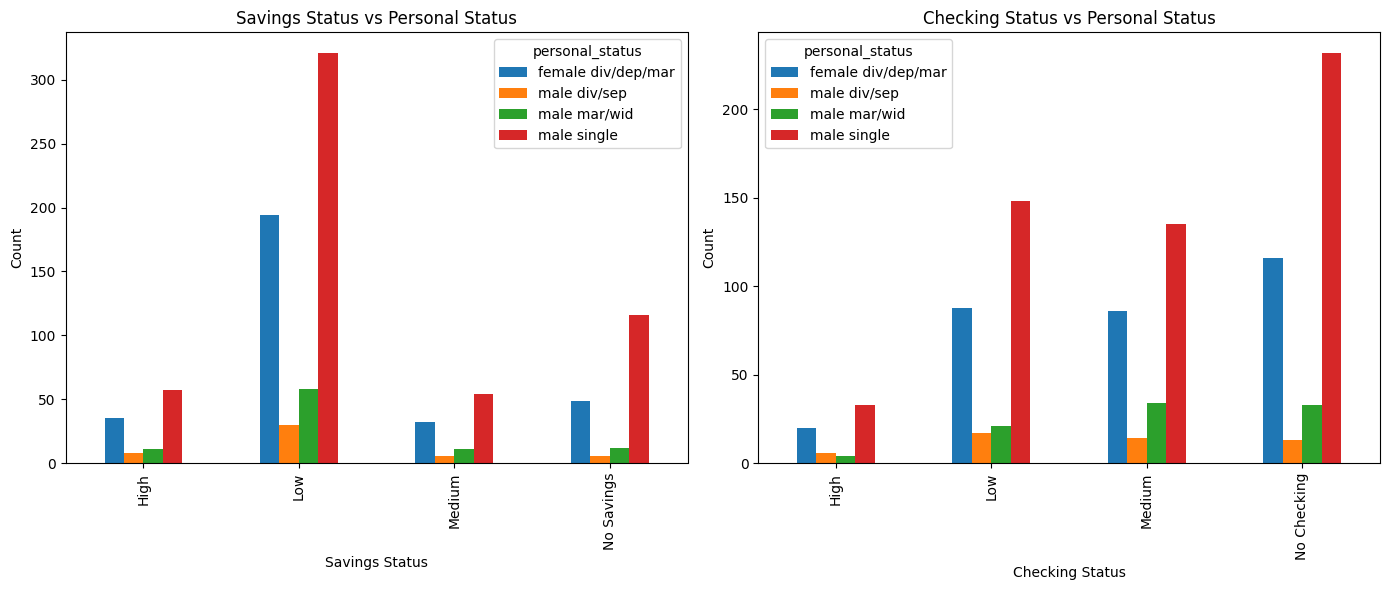

In [18]:
savingsCounts = df_cleaned.groupby(['savings_status', 'personal_status']).size().unstack(fill_value = 0)
checkingCounts = df_cleaned.groupby(['checking_status', 'personal_status']).size().unstack(fill_value = 0)

fig, axes = plt.subplots(1,2, figsize = (14,6))
savingsCounts.plot(kind = 'bar', ax = axes[0])
axes[0].set_title('Savings Status vs Personal Status')
axes[0].set_xlabel('Savings Status')
axes[0].set_ylabel('Count')

checkingCounts.plot(kind = 'bar', ax = axes[1])
axes[1].set_title('Checking Status vs Personal Status')
axes[1].set_xlabel('Checking Status')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

##### For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).

/tmp/ipykernel_4024559/922016470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age'] = filtered_df['age'].astype(float)


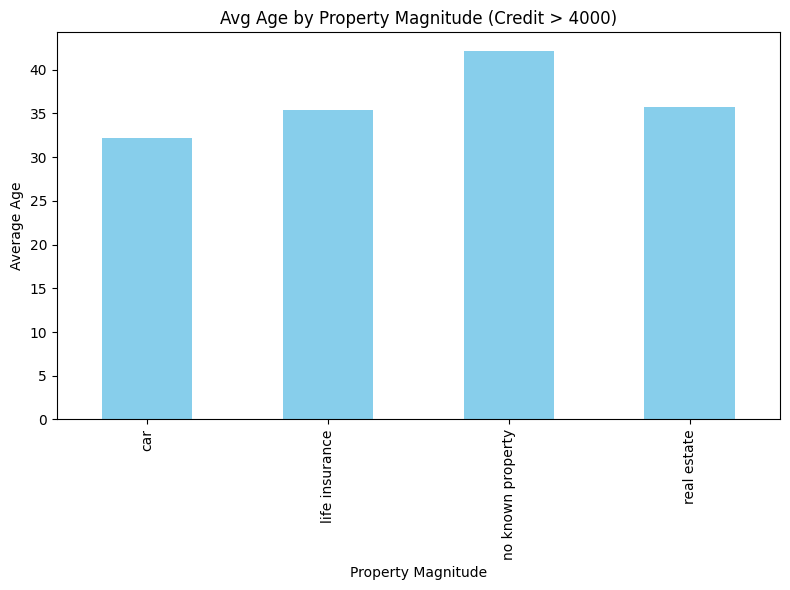

In [21]:
#filter out ppl with credit amt > 4000 first
filtered_df = df_cleaned[df_cleaned['credit_amount'].astype(float) > 4000] 
filtered_df['age'] = filtered_df['age'].astype(float)
#group by property magnitude and then calculate mean age
propMagAvgAge = filtered_df.groupby('property_magnitude')['age'].mean()

plt.figure(figsize = (8,6))
propMagAvgAge.plot(kind = 'bar', color = 'skyblue')
plt.title('Avg Age by Property Magnitude (Credit > 4000)')
plt.xlabel('Property Magnitude')
plt.ylabel('Average Age')
plt.tight_layout()
plt.show()

##### For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:

a. Personal status

b.Credit history

c. Job

In [22]:
df_cleaned.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


In [ ]:
subset = df_cleaned[(df_cleaned['savings_status'] == 'High') & (df_cleaned['age'].astype(float) > 40)]
fig, axes = plt.subplots(1,3, figsize = (18,6))
subset['personal_status'].value_counts().plot.pie(ax = axes[0], autopct = '%1.1f%%', startangle = 90, shadow=True)
axes[0].set_title('Personal Status')
axes[0].set_ylabel('')

subset['credit_history'].value_counts().plot.pie(ax = axes[1], autopct = '%1.1f%%', startangle = 90, shadow=True)
axes[1].set_title('Credit History')
axes[1].set_ylabel('')

subset['job'].value_counts().plot.pie(ax = axes[2], autopct = '%1.1f%%', startangle = 90, shadow=True)
axes[2].set_title('Job')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()